
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold                #Provides train/test indices to split data in train/test sets
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from numpy import linalg
#from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
#SciPy optimize provides functions for minimizing (or maximizing) objective functions, 
#possibly subject to constraints. It includes solvers for nonlinear problems 
#(with support for both local and global optimization algorithms), 
#linear programing, constrained and nonlinear least-squares, root finding, and curve fitting.
import scipy.optimize as sco  
from itertools import cycle, islice  
#Iterator is defined as object types which contains values that can be accessed or iterated using a loop
from scipy import sparse
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from sklearn.neighbors import kneighbors_graph
#!pip install -q datascience                                         
#Package that is required by pandas profiling
#!pip install -q pandas-profiling   
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp    # Importing library for scientific calculations

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
df = pd.read_excel("obesitymerge.xlsx")

In [4]:
df.sample(10)

,PatientId,Zone,State,District,Age,Gender,Waist,Height,Weight,DiabetesSelfDecl,Diafather,Diamother,Moderate,Vigorous,Dailyphysica,Hlba1c,DiabetesCalc,Diabetes,ClinicalNotes,Bmi,WcRiskScore,BmiRiskScore,BmiWcRiskScore,Waistscore,IDRSAge,IDRSFamilyH,IDRSBmi,IDRSBmiWc,IDRSPhysicalActivity,IDRS,IDRSWithBMI,IDRSWithBMIWC
3154,8106,E,Jharkhand,Ranchi,56,Female,110.00000,150,81,Normal,0,0,0,0,1,5.90000,Prediabetic,Normal,NewPreDia,36.00000,5,5,5,20,30,0,20,30,30,80,80,90
1402,3639,NW,JammuandKashmir,Kathua,38,Male,94.00000,157,64,Normal,0,0,0,0,2,5.40000,Normal,Normal,AlwaysNormal,25.96454,3,3,3,10,20,0,10,20,30,60,60,70
5341,13870,NE,Manipur,ImphalWest,47,Female,95.00000,138,49,Normal,0,0,5,4,5,5.70000,Normal,Normal,AlwaysNormal,25.72989,4,3,3,20,20,0,10,20,0,40,30,40
3732,9777,NW,JammuandKashmir,Samba,60,Female,88.00000,162,80,Normal,0,0,1,2,1,8.40000,Diabetic,Diabetic,NewDia,30.48316,3,4,4,10,30,0,20,30,30,70,80,90
4928,12889,S,TamilNadu,Kanchipuram,60,Female,84.00000,138,54,Normal,0,0,0,0,3,6.00000,Prediabetic,Normal,NewPreDia,28.35539,3,4,4,10,30,0,20,30,30,70,80,90
707,1950,NW,JammuandKashmir,Jammu,38,Male,99.00000,163,68,Normal,0,0,4,1,4,5.90000,Prediabetic,Normal,NewPreDia,25.59374,3,3,3,10,20,0,10,20,30,60,60,70
5847,14750,S,Karnataka,Bangalore,76,Female,71.00000,158,50,Diabetic,0,0,6,0,4,6.50000,Diabetic,Diabetic,KnownDiaDia,20.02884,2,2,1,0,30,0,0,0,20,50,50,50
6254,15561,S,AndhraPradesh,Visakhapatnam,60,Female,107.00000,150,60,Diabetic,1,1,1,1,4,7.60000,Diabetic,Diabetic,KnownDiaDia,26.66667,5,3,3,20,30,20,10,20,30,100,90,100
3550,9353,E,Orissa,Bargarh,33,Female,80.00000,162,70,Normal,0,0,0,0,2,4.60000,Normal,Normal,AlwaysNormal,26.67276,3,3,3,10,0,0,10,20,30,40,40,50
1533,3888,S,TamilNadu,Madurai,27,Female,92.00000,143,50,Normal,0,0,1,1,1,5.30000,Normal,Normal,AlwaysNormal,24.45107,4,3,3,20,0,0,10,20,30,50,40,50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7496 entries, 0 to 7495
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientId             7496 non-null   int64  
 1   Zone                  7496 non-null   object 
 2   State                 7496 non-null   object 
 3   District              7496 non-null   object 
 4   Age                   7496 non-null   int64  
 5   Gender                7496 non-null   object 
 6   Waist                 7495 non-null   float64
 7   Height                7496 non-null   int64  
 8   Weight                7496 non-null   int64  
 9   DiabetesSelfDecl      7496 non-null   object 
 10  Diafather             7496 non-null   int64  
 11  Diamother             7496 non-null   int64  
 12  Moderate              7496 non-null   int64  
 13  Vigorous              7496 non-null   int64  
 14  Dailyphysica          7496 non-null   int64  
 15  Hlba1c               

In [6]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [7]:
# dropping ALL duplicate values
df.drop_duplicates(keep = False, inplace = True)

In [8]:
df.DiabetesCalc.value_counts()

Normal         3547
Diabetic       2307
Prediabetic    1642
Name: DiabetesCalc, dtype: Int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 7495
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientId             7496 non-null   int64  
 1   Zone                  7496 non-null   string 
 2   State                 7496 non-null   string 
 3   District              7496 non-null   string 
 4   Age                   7496 non-null   int64  
 5   Gender                7496 non-null   string 
 6   Waist                 7495 non-null   float64
 7   Height                7496 non-null   int64  
 8   Weight                7496 non-null   int64  
 9   DiabetesSelfDecl      7496 non-null   string 
 10  Diafather             7496 non-null   int64  
 11  Diamother             7496 non-null   int64  
 12  Moderate              7496 non-null   int64  
 13  Vigorous              7496 non-null   int64  
 14  Dailyphysica          7496 non-null   int64  
 15  Hlba1c               

# Data Preprocessing

In [10]:
df.isnull().sum()

PatientId               0
Zone                    0
State                   0
District                0
Age                     0
Gender                  0
Waist                   1
Height                  0
Weight                  0
DiabetesSelfDecl        0
Diafather               0
Diamother               0
Moderate                0
Vigorous                0
Dailyphysica            0
Hlba1c                  0
DiabetesCalc            0
Diabetes                0
ClinicalNotes           0
Bmi                     0
WcRiskScore             0
BmiRiskScore            0
BmiWcRiskScore          0
Waistscore              0
IDRSAge                 0
IDRSFamilyH             0
IDRSBmi                 0
IDRSBmiWc               0
IDRSPhysicalActivity    0
IDRS                    0
IDRSWithBMI             0
IDRSWithBMIWC           0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(7496, 32)

In [13]:
df.describe()

,PatientId,Age,Waist,Height,Weight,Diafather,Diamother,Moderate,Vigorous,Dailyphysica,Hlba1c,Bmi,WcRiskScore,BmiRiskScore,BmiWcRiskScore,Waistscore,IDRSAge,IDRSFamilyH,IDRSBmi,IDRSBmiWc,IDRSPhysicalActivity,IDRS,IDRSWithBMI,IDRSWithBMIWC
count,7496.00000,7496.00000,7495.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000,7496.00000
mean,9508.34965,48.39221,91.20747,158.79336,65.77628,0.17129,0.15101,1.76507,1.17863,2.10112,6.45603,26.13203,3.19544,3.15155,2.89154,11.21665,22.35993,3.22305,10.97519,18.37513,27.44130,64.24093,63.99947,71.39941
std,5321.69188,11.86568,10.90646,9.53561,12.16213,0.37679,0.35809,2.07676,1.71225,1.31687,1.82042,4.59481,1.07978,0.92564,1.14609,7.91806,9.47419,5.72358,7.51047,9.88263,5.43411,15.13330,15.10690,16.63011
min,0.00000,20.00000,60.00000,121.00000,41.00000,0.00000,0.00000,0.00000,0.00000,1.00000,3.20000,12.20703,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,4871.75000,40.00000,84.00000,152.00000,57.00000,0.00000,0.00000,0.00000,0.00000,1.00000,5.30000,23.11111,2.00000,3.00000,2.00000,0.00000,20.00000,0.00000,10.00000,10.00000,30.00000,60.00000,60.00000,60.00000
50%,9811.50000,48.00000,90.00000,158.00000,65.00000,0.00000,0.00000,1.00000,0.00000,2.00000,5.80000,25.71166,3.00000,3.00000,3.00000,10.00000,20.00000,0.00000,10.00000,20.00000,30.00000,70.00000,70.00000,70.00000
75%,14394.25000,58.00000,98.00000,165.00000,73.00000,0.00000,0.00000,3.00000,2.00000,3.00000,6.80000,28.62147,4.00000,4.00000,4.00000,20.00000,30.00000,10.00000,20.00000,30.00000,30.00000,70.00000,70.00000,80.00000
max,17872.00000,85.00000,150.00000,194.00000,168.00000,1.00000,1.00000,6.00000,6.00000,6.00000,15.80000,66.22230,5.00000,5.00000,5.00000,20.00000,30.00000,20.00000,20.00000,30.00000,30.00000,100.00000,100.00000,110.00000


In [14]:
df=df.drop(['PatientId', 'Zone', 'State', 'District'],axis=1)

In [15]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
 df = df.dropna(axis=0)

In [17]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'DiabetesSelfDecl', 'DiabetesCalc','Diabetes', 'ClinicalNotes', 'WcRiskScore', 'BmiRiskScore','BmiWcRiskScore', 'Waistscore', 'IDRSAge', 'IDRSFamilyH', 'IDRSBmi','IDRSBmiWc', 'IDRSPhysicalActivity', 'IDRS', 'IDRSWithBMI',
       'IDRSWithBMIWC']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Waist,Height,Weight,DiabetesSelfDecl,Diafather,Diamother,Moderate,Vigorous,Dailyphysica,Hlba1c,DiabetesCalc,Diabetes,ClinicalNotes,Bmi,WcRiskScore,BmiRiskScore,BmiWcRiskScore,Waistscore,IDRSAge,IDRSFamilyH,IDRSBmi,IDRSBmiWc,IDRSPhysicalActivity,IDRS,IDRSWithBMI,IDRSWithBMIWC
0,35,0,70.00000,157,47,1,0,0,0,0,3,4.90000,1,1,0,19.06771,1,1,1,0,1,0,0,0,2,5,5,5
1,38,0,81.00000,145,65,1,1,0,0,3,1,5.30000,1,1,0,30.91558,2,3,4,1,1,1,2,3,2,7,8,9
2,42,0,102.00000,159,68,1,1,1,0,0,2,5.00000,1,1,0,26.89767,4,2,3,2,1,2,1,2,2,9,8,9
3,37,0,76.00000,142,44,1,1,0,2,3,2,5.40000,1,1,0,21.82107,1,1,1,0,1,1,0,0,2,6,6,6
4,47,1,87.00000,160,60,1,1,0,2,3,3,12.60000,0,0,4,23.43750,1,2,2,0,1,1,1,1,2,6,7,7


In [18]:
x=df.drop(['DiabetesCalc','Hlba1c','ClinicalNotes', 'Diabetes'],axis=1)
y=df['DiabetesCalc']
z=df['Diabetes']
x1= df['ClinicalNotes']

# Feature Selection using SelectKBest with chi2

In [19]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x,y)


In [20]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [21]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']

In [22]:
featureScores

,features,Score
0,Age,2434.68283
1,Gender,33.47882
2,Waist,153.00629
3,Height,4.15566
4,Weight,231.68792
5,DiabetesSelfDecl,317.74953
6,Diafather,49.55539
7,Diamother,80.47706
8,Moderate,1.28297
9,Vigorous,4.22005


In [23]:
print(featureScores.nlargest(8,'Score'))

            features      Score
0                Age 2434.68283
5   DiabetesSelfDecl  317.74953
16           IDRSAge  268.62880
22       IDRSWithBMI  251.25732
23     IDRSWithBMIWC  248.71896
4             Weight  231.68792
21              IDRS  222.53718
2              Waist  153.00629


In [24]:
#sel_df= df[['IDRSAge','Hlba1c','IDRSWithBMI','Age','IDRSWithBMIWC','IDRS','IDRSFamilyH','DiabetesSelfDecl']]
sel_df= df[['IDRSAge','Waist','IDRSWithBMI','Age','IDRSWithBMIWC','IDRS','Weight']]# removed 'DiabetesSelfDecl'

# OverSampling the Imbalance Data Set

In [25]:
X_train,X_test,y_train,y_test = train_test_split(sel_df,y,test_size=0.2)

In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE("minority")
X_train,y_train=smote.fit_resample(X_train,y_train)

# Prediction before Tuning HyperParameters 

In [27]:
import time

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracy=metrics.f1_score(y_test,y_pred,average='micro')
print(accuracy*100)

40.29352901934623


In [29]:
print("Precision Score : ",precision_score(y_test, y_pred,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,average='micro'))

Precision Score :  0.4029352901934623
Recall Score :  0.4029352901934623


In [30]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.f1_score(y_test,y_pred,average='micro')
print(accuracy*100)

45.29686457638425


Text(0.5, 15.0, 'Predicted label')

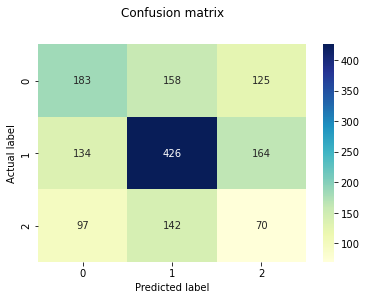

In [31]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.45296864576384255
              precision    recall  f1-score   support

           0       0.44      0.39      0.42       466
           1       0.59      0.59      0.59       724
           2       0.19      0.23      0.21       309

    accuracy                           0.45      1499
   macro avg       0.41      0.40      0.40      1499
weighted avg       0.46      0.45      0.46      1499



In [33]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.recall_score(y_test,y_pred,average='micro')
print(accuracy*100)

38.0920613742495


In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.f1_score(y_test,y_pred,average='micro')
print(accuracy*100)

46.831220813875916


In [35]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.f1_score(y_test,y_pred,average='micro')
print(accuracy*100)

28.752501667778517


# Predicting by Tuning HyperParameters using GridSearchCV

In [36]:
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#### Grid Search for SVM

In [37]:
start_svm= time.time()

In [38]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator =svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [39]:
 grid_search.best_score_

0.5900546539771389

In [40]:
grid_search.best_params_

{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}

In [41]:
svm = SVC(C = 10, kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.recall_score(y_test,y_pred,average='micro')
print(accuracy*100)

42.69513008672448


Accuracy =  0.4269513008672448
-
[[ 22 131 313]
 [ 13 449 262]
 [  9 131 169]]
-
              precision    recall  f1-score   support

           0       0.50      0.05      0.09       466
           1       0.63      0.62      0.63       724
           2       0.23      0.55      0.32       309

    accuracy                           0.43      1499
   macro avg       0.45      0.40      0.34      1499
weighted avg       0.51      0.43      0.40      1499

-


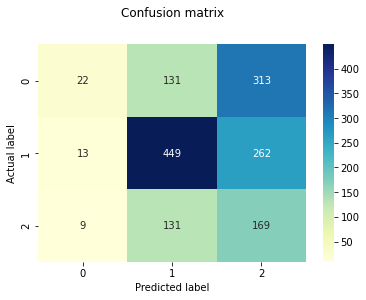

In [42]:
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('-')
print(confusion_matrix(y_test,y_pred))
print('-')
print(classification_report(y_test,y_pred))
print('-')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [44]:
print(multiclass_roc_auc_score(y_test, y_pred))

0.5619577710909727


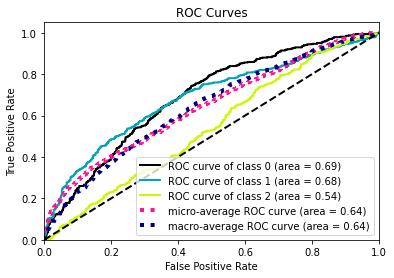

In [45]:
from sklearn.metrics import roc_curve
y_pred_keras = svm.predict_proba(X=X_test)
import scikitplot as skplt
plot = skplt.metrics.plot_roc(y_test, y_pred_keras)
plt.show()

In [46]:
end_svm= time.time()
time_svm = end_svm-start_svm
print('Time taken:',time_svm)

Time taken: 2840.9420087337494


#### Grid Search for DT

In [47]:
start_dtc= time.time()

In [48]:
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]}
grid_search = GridSearchCV(estimator =dtc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(3),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [49]:
 grid_search.best_score_

0.5049471806861586

In [50]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [51]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth = 2)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracy=metrics.recall_score(y_test,y_pred,average='micro')
print(accuracy*100)

34.02268178785857


Accuracy =  0.3402268178785857
-
[[  0  36 430]
 [  0 247 477]
 [  0  46 263]]
-
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       466
           1       0.75      0.34      0.47       724
           2       0.22      0.85      0.36       309

    accuracy                           0.34      1499
   macro avg       0.33      0.40      0.27      1499
weighted avg       0.41      0.34      0.30      1499

-


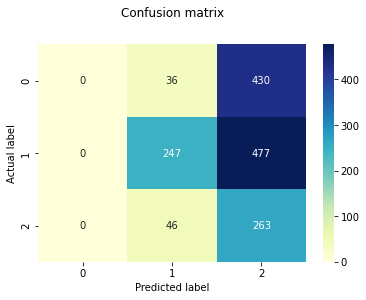

0.5540502635860224


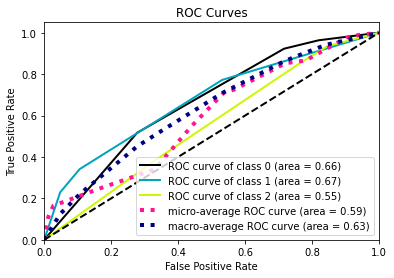

In [52]:
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('-')
print(confusion_matrix(y_test,y_pred))
print('-')
print(classification_report(y_test,y_pred))
print('-')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(multiclass_roc_auc_score(y_test, y_pred))

from sklearn.metrics import roc_curve
y_pred_keras = dtc.predict_proba(X=X_test)
import scikitplot as skplt
plot = skplt.metrics.plot_roc(y_test, y_pred_keras)
plt.show()

In [53]:
end_dtc= time.time()
time_dtc = end_dtc-start_dtc
print('Time taken:', time_dtc)

Time taken: 3.1709818840026855


#### Gridsearch for RF

In [54]:
start_rf= time.time()

In [55]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [56]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_search = GridSearchCV(estimator =rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [57]:
 grid_search.best_score_

0.4837142928539301

In [58]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [59]:
rfc = RandomForestClassifier(bootstrap = True,
 max_depth = 4,
 max_features = 'sqrt',
 min_samples_leaf = 2,
 min_samples_split= 5,
 n_estimators = 41)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracy=metrics.recall_score(y_test,y_pred,average='micro')
print(accuracy*100)

44.429619746497664


Accuracy =  0.44429619746497667
-
[[ 68 113 285]
 [ 28 434 262]
 [ 26 119 164]]
-
              precision    recall  f1-score   support

           0       0.56      0.15      0.23       466
           1       0.65      0.60      0.62       724
           2       0.23      0.53      0.32       309

    accuracy                           0.44      1499
   macro avg       0.48      0.43      0.39      1499
weighted avg       0.54      0.44      0.44      1499

-


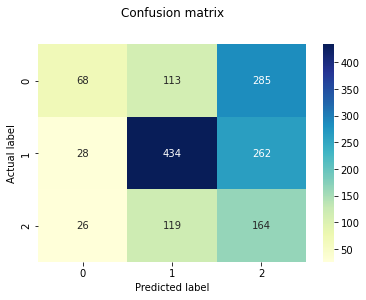

0.5774701609185033


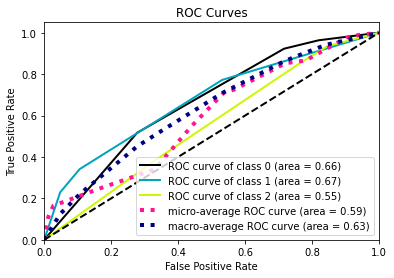

In [60]:
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('-')
print(confusion_matrix(y_test,y_pred))
print('-')
print(classification_report(y_test,y_pred))
print('-')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(multiclass_roc_auc_score(y_test, y_pred))

from sklearn.metrics import roc_curve
y_pred_keras = dtc.predict_proba(X=X_test)
import scikitplot as skplt
plot = skplt.metrics.plot_roc(y_test, y_pred_keras)
plt.show()

In [61]:
end_rf= time.time()
time_rf= end_rf-start_rf
print('Time taken:',time_rf)

Time taken: 35.99130654335022


#### GridSearch for GNB

In [62]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator =gnb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [63]:
 grid_search.best_score_

0.46660538471973323

In [64]:
grid_search.best_params_

{'var_smoothing': 0.12328467394420659}

In [65]:
gnb = GaussianNB(var_smoothing=0.000001873817422860383)
# earlier var_smoothing value= 0.0002848035868435802
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.recall_score(y_test,y_pred,average='micro')
print(accuracy*100)

46.831220813875916


In [66]:
parameters = {"alpha":[1.0,2.0],'binarize':[0.0,1.0],"fit_prior":[True,False], 'class_prior':[0,1,2,3,4,5,6,None]}
grid_search = GridSearchCV(estimator =bnb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [67]:
 grid_search.best_score_

0.45364764427436227

In [68]:
grid_search.best_params_

{'alpha': 1.0, 'binarize': 1.0, 'class_prior': None, 'fit_prior': True}

#### Using XGBoost

[16:04:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Text(0.5, 15.0, 'Predicted label')

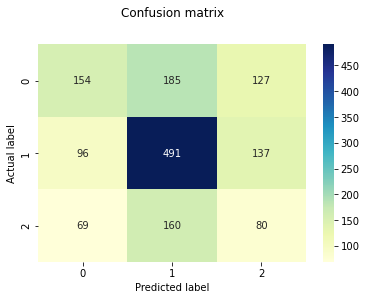

In [69]:
XG_start_time = time.time()
import xgboost as xgb

gbm = xgb.XGBClassifier(

     learning_rate = 0.02,

     n_estimators= 2000,

     max_depth= 4,

     min_child_weight= 2,

     #gamma=1,

     gamma=0.9,                        

     subsample=0.8,

     colsample_bytree=0.8,

     objective= 'binary:logistic',

     eval_metric = 'logloss',

     nthread= -1,
    
    booster = 'dart',

     scale_pos_weight=1).fit(X_train, y_train)

ypred_XG=gbm.predict(X_test)

from sklearn import metrics

import seaborn as sns

cnf_matrix = metrics.confusion_matrix(y_test, ypred_XG)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1)

plt.ylabel('Actual label')

plt.xlabel('Predicted label')


In [70]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, ypred_XG))

print("Recall score of the model: ", recall_score(y_test, ypred_XG, average='macro'))

print("precision of the model: ", precision_score(y_test, ypred_XG, average='macro'))

ACCURACY OF THE MODEL:  0.4836557705136758
Recall score of the model:  0.422516191653269
precision of the model:  0.43421244479573945


In [71]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [72]:
print(multiclass_roc_auc_score(y_test, ypred_XG))

0.5734682667200863


In [73]:
XG_end_time = time.time()
time_XG= XG_end_time - XG_start_time

In [74]:
print('Time taken in minutes:',time_XG/60)

Time taken in minutes: 12.508720326423646
